<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data

# Overview

Ames is a town in Iowa with a population of 66,023. Ames is in Story County and is one of the best places to live in Iowa. Living in Ames offers residents an urban suburban mix feel and most residents rent their homes. In Ames there are a lot of bars, coffee shops, and parks. Many young professionals live in Ames and residents tend to lean conservative. The public schools in Ames are highly rated.


# Problem Statement

As part of real estate investor - analytics team, I will be analysing the Aimes Iowa Housing Data set to give a suggestion on top 10 features that can give a good housing sales price.

As a real estate investor, it is necessary to see trends when purchasing a house in hopes that we can make profit from selling or renting a house. One of the ways is to just see what are the top 10 features that buyers look out for and are willing to pay high price for the house that they are interested in.

In the later part of this notebook, I will also attempt to predict the saleprice of the houses with features that are already tabulated in, called Test.CSV

# Importing Libraries


In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

%matplotlib inline

# Load Datas

In [2]:
#reading the train dataset
df_train = pd.read_csv('./datasets/train.csv')

In [3]:
df_test = pd.read_csv('./datasets/test.csv')

In [4]:
#increase pandas default max_rows so I can view all columns at once
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

In [5]:
#Finding the Number of Columns and rows of each dataset
print(f'Train Dataset shape is {df_train.shape} while Test Dataset shape is {df_test.shape}')

Train Dataset shape is (2051, 81) while Test Dataset shape is (878, 80)


In [6]:
#Finding the missing column
M_Column = set(df_train.columns) - set(df_test.columns)
print(M_Column)

{'SalePrice'}


# Data fields
Here's a brief version of what you'll find in the data description file.  

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet   
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
Functional: Home functionality rating  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
PavedDrive: Paved driveway  
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: Value of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  

# Exploring Train Dataset

In [7]:
#changing the columns names to lowercase and no spaces
df_train.columns = df_train.columns.str.lower().str.replace(' ', '')

In [8]:
#see the 1st 5 rows of train set
df_train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
#see the last 5 rows of train dataset
df_train.tail()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,750.0,295.0,1200.0,GasA,TA,Y,SBrkr,1200,0,0,1200,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956.0,Unf,1.0,294.0,TA,TA,Y,0,189,140,0,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,Gd,Y,SBrkr,1028,776,0,1804,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1999.0,Fin,2.0,442.0,TA,TA,Y,140,60,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


In [10]:
#looking at the train set info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2051 non-null   int64  
 1   pid            2051 non-null   int64  
 2   mssubclass     2051 non-null   int64  
 3   mszoning       2051 non-null   object 
 4   lotfrontage    1721 non-null   float64
 5   lotarea        2051 non-null   int64  
 6   street         2051 non-null   object 
 7   alley          140 non-null    object 
 8   lotshape       2051 non-null   object 
 9   landcontour    2051 non-null   object 
 10  utilities      2051 non-null   object 
 11  lotconfig      2051 non-null   object 
 12  landslope      2051 non-null   object 
 13  neighborhood   2051 non-null   object 
 14  condition1     2051 non-null   object 
 15  condition2     2051 non-null   object 
 16  bldgtype       2051 non-null   object 
 17  housestyle     2051 non-null   object 
 18  overallq

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
mssubclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lotfrontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lotarea,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overallqual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overallcond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
yearbuilt,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
yearremod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
masvnrarea,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


The 2051 datasets that was captured were for the houses that was built from 1872 t0 2010.

The average living area (Gr Liv Area) is 1499sf.The smallest living area is 334sf and max is 5642 sf. 

The average basement(Total Bsmt SF) is 1058sf. The smallest basement  is 0 sf and the largest is 6110 sf. 0 means that it does not have basement.

The average garage area (Garage Area) is 474sf. The smallest garage is 0sf and the largest is 1418sf. The largest garage is bigger compared to the smallest living area as shown. 0 in garage means there is no garage.

The average number of rooms (TotRms AbvGrd) is 6.44. The min number of rooms is 2 and max is 15 rooms.

The average sales price for the house (SalePrice) is USD dollars 181 469. The cheapest house was sold at USD dollars 12 789 whereas the most expensive house was sold at USD dollars 611 657.


Let's keep this facts in mind while trying to investigate further.

In [12]:
df_train.columns.unique()

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pa

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


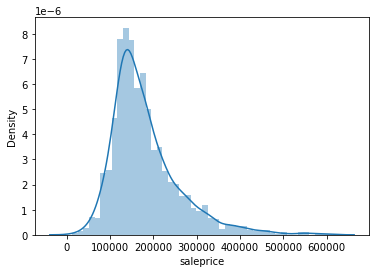

In [13]:
#plotting histogram for sales price
sns.distplot(df_train['saleprice']);

The SalePrice is skewed to the right (positive skewness). This means that the mean is greater than the median. This is good from an investor point of view as the the average sale price is greater than the median sale price.

# Data Cleaning: Initial Checks

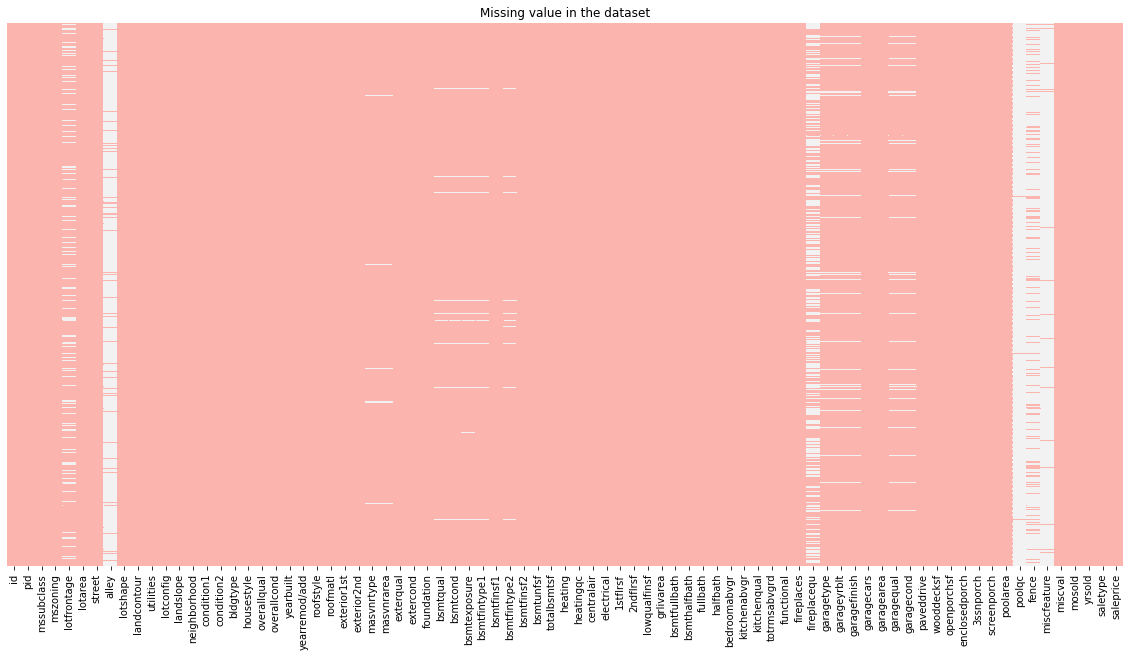

In [14]:
#plotting a heatmap for missing values in train data set
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isnull(),cbar=False,cmap='Pastel1',yticklabels=False)
plt.title('Missing value in the dataset');

In [15]:
#for str column, print the count of unique values, for numerical column, print the percentage of 0s.

def data_summaries (df):
    for i in df_train.columns:
        print('--------%s---------' % i)
        if df_train[i].dtype == np.object:
            print(df_train[i].value_counts())   #print count of unique values for dtype np.object
        elif len(df_train[df_train[i] == 0]) >= 1026:
            print (i, '\n', '% 0s (HIGH!):', round ((len(df_train[df_train[i] == 0])/2051)*100),\
                   '\n','no. 0s:', len(df_train[df_train[i] == 0]))      
        else:
            print( i, '\n', '% 0s: ', round ((len(df_train[df_train[i] == 0])/2051)*100))
        print('\n')
        
data_summaries(df_train)

--------id---------
id 
 % 0s:  0


--------pid---------
pid 
 % 0s:  0


--------mssubclass---------
mssubclass 
 % 0s:  0


--------mszoning---------
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: mszoning, dtype: int64


--------lotfrontage---------
lotfrontage 
 % 0s:  0


--------lotarea---------
lotarea 
 % 0s:  0


--------street---------
Pave    2044
Grvl       7
Name: street, dtype: int64


--------alley---------
Grvl    85
Pave    55
Name: alley, dtype: int64


--------lotshape---------
Reg    1295
IR1     692
IR2      55
IR3       9
Name: lotshape, dtype: int64


--------landcontour---------
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: landcontour, dtype: int64


--------utilities---------
AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64


--------lotconfig---------
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: lotconfig, dtype: in

<ipython-input-15-fe1c52a702c3>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df_train[i].dtype == np.object:
<ipython-input-15-fe1c52a702c3>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df_train[i].dtype == np.object:
<ipython-input-15-fe1c52a702c3>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; fo

In [16]:
#Determining the ratio between numerical and categorical features
numeric_features = df_train.select_dtypes(include=[np.number])
categorical_features = df_train.select_dtypes(exclude=[np.number])

In [17]:
print(f'There are a total of {categorical_features.shape[1]} Categorical data and {numeric_features.shape[1]} Numerical data')

There are a total of 42 Categorical data and 39 Numerical data


#### Checking for null values in numerical features

In [18]:
# to sort and check the number of null values in numerical features
num_null_columns=numeric_features.columns[numeric_features.isnull().any()]
numeric_features[num_null_columns].isnull().sum()

lotfrontage     330
masvnrarea       22
bsmtfinsf1        1
bsmtfinsf2        1
bsmtunfsf         1
totalbsmtsf       1
bsmtfullbath      2
bsmthalfbath      2
garageyrblt     114
garagecars        1
garagearea        1
dtype: int64

In [19]:
#Percentage of Missing values per column in numerical features
(numeric_features[num_null_columns].isnull().sum()/len(df_train))*100

lotfrontage     16.089712
masvnrarea       1.072647
bsmtfinsf1       0.048757
bsmtfinsf2       0.048757
bsmtunfsf        0.048757
totalbsmtsf      0.048757
bsmtfullbath     0.097513
bsmthalfbath     0.097513
garageyrblt      5.558264
garagecars       0.048757
garagearea       0.048757
dtype: float64

<AxesSubplot:>

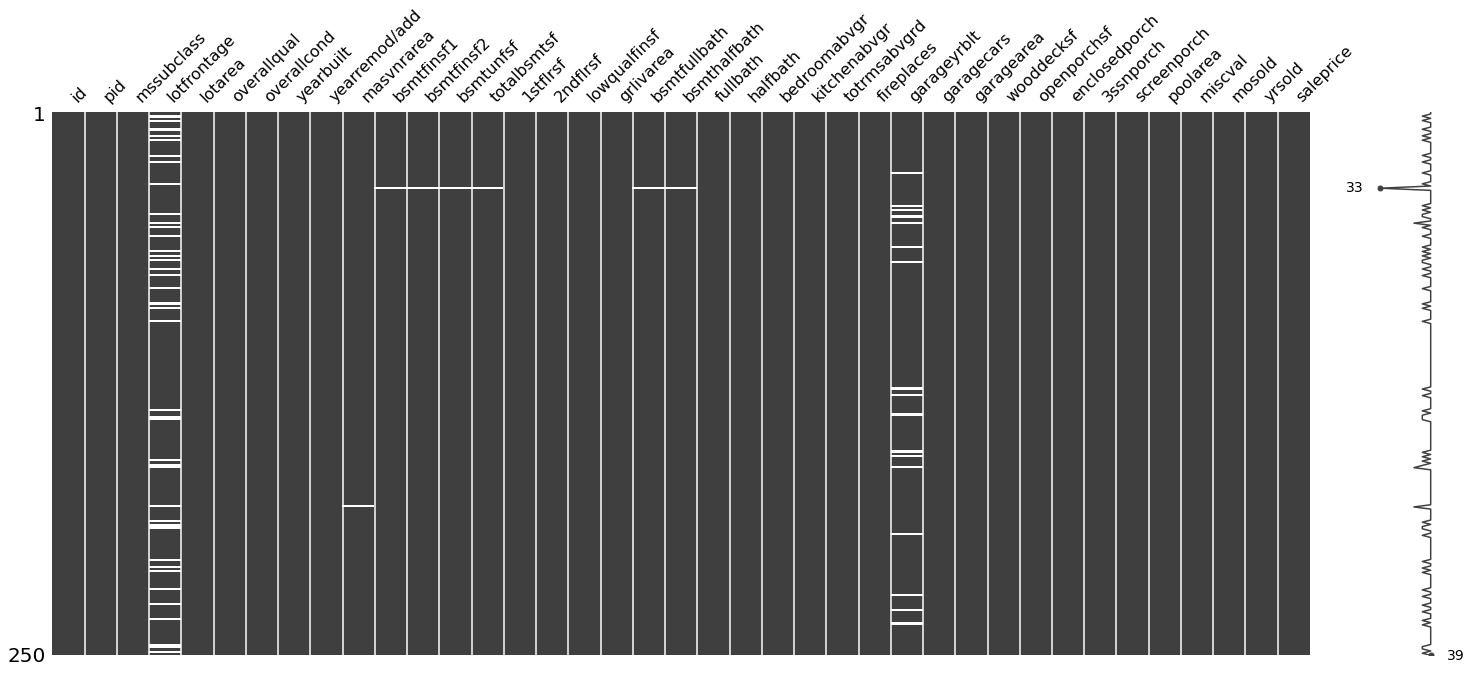

In [20]:
#Visualizing Missing Columns in Numerical Data
filtered_data1 = msno.nullity_filter(numeric_features, filter='bottom', n=0, p=0)
msno.matrix(filtered_data1.sample(250))

From the above, lotfrontage, garageyrblt, masvnrarea has the highest missing values for the numerical features.  

Lot Frontage: Linear feet of street connected to property   
Garage Yr Blt: Year Garage was built  
Mas Vnr Area: Masonry Veneer area in square feet  

#### Checking for null values for categorical features

In [21]:
#looking at categorical features
categorical_features.columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype'],
      dtype='object')

In [22]:
#checking for null values for categorical features
cat_null_columns=categorical_features.columns[categorical_features.isnull().any()]
categorical_features[cat_null_columns].isnull().sum()

alley           1911
masvnrtype        22
bsmtqual          55
bsmtcond          55
bsmtexposure      58
bsmtfintype1      55
bsmtfintype2      56
fireplacequ     1000
garagetype       113
garagefinish     114
garagequal       114
garagecond       114
poolqc          2042
fence           1651
miscfeature     1986
dtype: int64

In [23]:
#Percentage of Missing values per column in categorical features
(categorical_features[cat_null_columns].isnull().sum()/len(df_train))*100

alley           93.174061
masvnrtype       1.072647
bsmtqual         2.681619
bsmtcond         2.681619
bsmtexposure     2.827889
bsmtfintype1     2.681619
bsmtfintype2     2.730375
fireplacequ     48.756704
garagetype       5.509508
garagefinish     5.558264
garagequal       5.558264
garagecond       5.558264
poolqc          99.561190
fence           80.497318
miscfeature     96.830814
dtype: float64

In [24]:
#Number of columns with missing data fro categorical features
len(categorical_features[cat_null_columns].isnull().sum())

15

<AxesSubplot:>

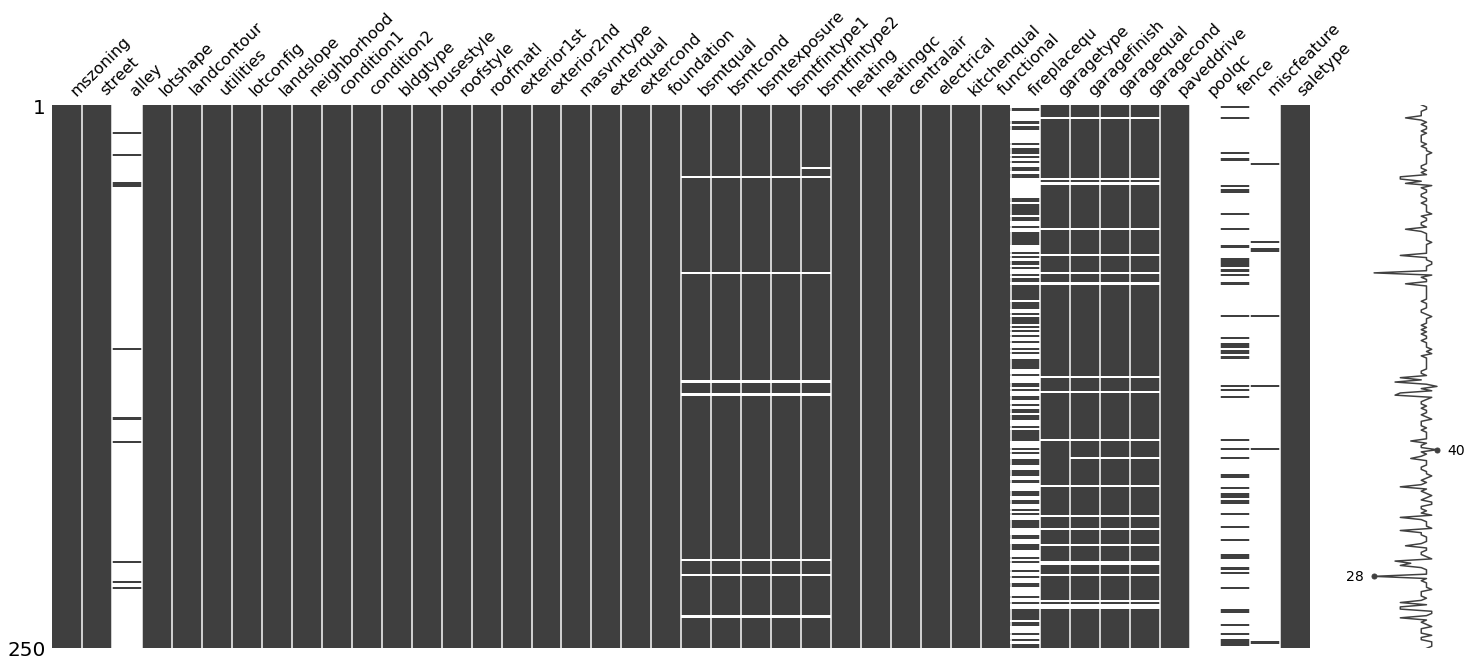

In [25]:
#Visualizing Missing Columns in Categorical Data
filtered_data = msno.nullity_filter(categorical_features, filter='bottom', n=0, p=0)
msno.matrix(filtered_data.sample(250))

From the above, poolqc, fence, miscfeature, alley, fireplacequ has the highest percentage of missing values. 

Pool QC: Pool Quality  
Fence: Fence Quality  
Misc Feature: Miscellaneous Feature not covered in other categories   
Alley:Type of alley access to the property  
Fireplace Qu: Fireplace Quality  

# Data Cleaning

In [26]:
#train data shape before dropping columns
df_train.shape

(2051, 81)

### Data Cleaning: Drop NaN's for garageyrblt and alley

In [27]:
#dropping columns Garage Yr Blt,and Alley 
df_train.drop(labels=['garageyrblt','alley'], axis=1, inplace = True)

After much researching online as well as weighing out the features, I have decided to drop the features above. 

In [28]:
#checking the train data set shape after dropping the above columns
df_train.shape

(2051, 79)

**Now, I will go through each feature in my numerical features as well as categorical features and handle the missing data.**

**1. Lot Frontage**: Lot Frontage (Continuous): Linear feet of street connected to property.it is unlikely that a lot will have no street connection. Hence no 0 values makes sense and we should not fill null values with 0. Instead, we can group by 'Neighborhood', find the median 'Lot Frontage' value of each neighborhood, and fill the median 'Lot Frontage' value depending on which neighborhood the house belongs to.

In [29]:
df_train['lotfrontage'] = df_train.groupby('neighborhood')['lotfrontage'].apply(lambda x: x.fillna(x.median()))

In [30]:
#checking after filling in median
df_train.groupby('neighborhood')['lotfrontage'].median()

neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    82.5
CollgCr    70.0
Crawfor    64.0
Edwards    63.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    74.0
NAmes      72.0
NPkVill    24.0
NWAmes     80.0
NoRidge    88.5
NridgHt    93.0
OldTown    60.0
SWISU      60.0
Sawyer     70.0
SawyerW    67.0
Somerst    73.0
StoneBr    60.0
Timber     79.0
Veenker    80.0
Name: lotfrontage, dtype: float64

In [31]:
#looking at the dataset that still has nan value
df_train[(df_train['neighborhood'] == 'GrnHill') | (df_train['neighborhood'] == 'Landmrk')]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
463,2257,916253320,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,WD,330000
1121,2789,907230240,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,NaN,Detchd,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,137000
1211,2893,916252170,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,230000


In [32]:
#applying median to the remaining 3 Nan Value
df_train['lotfrontage'] = df_train['lotfrontage'].fillna(df_train['lotfrontage'].median())

In [33]:
# looking at outliers for lot frontage
df_train['lotfrontage'].sort_values()

315      21.0
677      21.0
1274     21.0
1431     21.0
1788     21.0
        ...  
1263    174.0
441     195.0
1875    200.0
960     313.0
1335    313.0
Name: lotfrontage, Length: 2051, dtype: float64

Take note: I will maybe drop lot frontage = 313 at the end if needed.

**2. Mas Vnr Type and Area**: 

Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None  	None
       Stone	Stone
	
Mas Vnr Area (Continuous): Masonry veneer area in square feet

In [34]:
#looking at mas vnr area and type as it has 22 null values
df_train[df_train['masvnrtype'].isnull()][['masvnrtype','masvnrarea']]

,masvnrtype,masvnrarea
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [35]:
df_train[df_train['masvnrarea'] == 0][['masvnrtype','masvnrarea']].head()

,masvnrtype,masvnrarea
2,None,0.0
3,None,0.0
4,None,0.0
5,None,0.0
8,None,0.0


Since the type is none, area is 0. We can fill the null for the respective column with None and 0.

In [36]:
df_train['masvnrtype'] = df_train['masvnrtype'].fillna('None')
df_train['masvnrarea'] = df_train['masvnrarea'].fillna(0)

**3. Bsmt Category**   
     
 These are all under the same category: basement  
 Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFin Type 1	(Ordinal): Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFin SF 1 (Continuous): Type 1 finished square feet

BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFin SF 2 (Continuous): Type 2 finished square feet

Bsmt Unf SF (Continuous): Unfinished square feet of basement area

Total Bsmt SF (Continuous): Total square feet of basement area

In [37]:
df_train[df_train['totalbsmtsf'].isnull()][['bsmtqual','bsmtcond','bsmtexposure','bsmtfintype1','bsmtfinsf1','bsmtfintype2','bsmtfinsf2','bsmtunfsf','totalbsmtsf','bsmtfullbath','bsmthalfbath']]

,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,bsmtfullbath,bsmthalfbath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_train[df_train['bsmtqual'].isnull()][['bsmtcond','bsmtexposure','bsmtfintype1','bsmtfinsf1','bsmtfintype2','bsmtfinsf2','bsmtunfsf','totalbsmtsf','bsmtfullbath','bsmthalfbath']]

,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,bsmtfullbath,bsmthalfbath
12,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [39]:
#since the row above shows that it is NaN for all columns, indicates that it has no basement. Fill it with 0
df_train['totalbsmtsf'] = df_train['totalbsmtsf'].fillna(0)
df_train['bsmtfinsf1'] = df_train['bsmtfinsf1'].fillna(0)
df_train['bsmtfinsf2'] = df_train['bsmtfinsf2'].fillna(0)
df_train['bsmtunfsf'] = df_train['bsmtunfsf'].fillna(0)
df_train['bsmtqual'] = df_train['bsmtqual'].fillna('NA')
df_train['bsmtcond'] = df_train['bsmtcond'].fillna('NA')
df_train['bsmtexposure'] = df_train['bsmtexposure'].fillna('NA')
df_train['bsmtfintype1'] = df_train['bsmtfintype1'].fillna('NA')
df_train['bsmtfintype2'] = df_train['bsmtfintype2'].fillna('NA')
df_train['bsmtfullbath'] = df_train['bsmtfullbath'].fillna(0)
df_train['bsmthalfbath'] = df_train['bsmthalfbath'].fillna(0)

From the above results, we can safely note that the houses do not have basement. Hence, we can fill the respective features with 0 or NA.

**4. Garage Category**

Garage Type (Nominal): Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
Garage Yr Blt (Discrete): Year garage was built
		
Garage Finish (Ordinal)	: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
Garage Cars (Discrete): Size of garage in car capacity

Garage Area (Continuous): Size of garage in square feet

Garage Qual (Ordinal): Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
Garage Cond (Ordinal): Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [40]:
#see the remaining null features left
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

fireplacequ     1000
garagetype       113
garagefinish     114
garagecars         1
garagearea         1
garagequal       114
garagecond       114
poolqc          2042
fence           1651
miscfeature     1986
dtype: int64

In [41]:
df_train[df_train['garagefinish'].isnull()][['garagetype','garagecars','garagearea','garagequal','garagecond']]

,garagetype,garagecars,garagearea,garagequal,garagecond
28,NaN,0.0,0.0,NaN,NaN
53,NaN,0.0,0.0,NaN,NaN
65,NaN,0.0,0.0,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN
101,NaN,0.0,0.0,NaN,NaN
103,NaN,0.0,0.0,NaN,NaN
114,NaN,0.0,0.0,NaN,NaN
120,NaN,0.0,0.0,NaN,NaN
134,NaN,0.0,0.0,NaN,NaN
136,NaN,0.0,0.0,NaN,NaN


In [42]:
df_train[df_train['garagetype'].isnull()][['garagefinish','garagecars','garagearea','garagequal','garagecond']]

,garagefinish,garagecars,garagearea,garagequal,garagecond
28,NaN,0.0,0.0,NaN,NaN
53,NaN,0.0,0.0,NaN,NaN
65,NaN,0.0,0.0,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN
101,NaN,0.0,0.0,NaN,NaN
103,NaN,0.0,0.0,NaN,NaN
114,NaN,0.0,0.0,NaN,NaN
120,NaN,0.0,0.0,NaN,NaN
134,NaN,0.0,0.0,NaN,NaN
136,NaN,0.0,0.0,NaN,NaN


From the above, we can see that most likely there is no garage for these houses hence we can input in either 0 or NA for the respective features.

In [43]:
df_train['garagetype'] = df_train['garagetype'].fillna('NA')
df_train['garagefinish'] = df_train['garagefinish'].fillna('NA')
df_train['garagecars'] = df_train['garagecars'].fillna(0)
df_train['garagearea'] = df_train['garagearea'].fillna(0)
df_train['garagequal'] = df_train['garagequal'].fillna('NA')
df_train['garagecond'] = df_train['garagecond'].fillna('NA')

**5. Fireplace Category**

Fireplaces (Discrete): Number of fireplaces

FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [44]:
#see the remaining null features left
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

fireplacequ    1000
poolqc         2042
fence          1651
miscfeature    1986
dtype: int64

In [45]:
df_train[df_train['fireplacequ'].isnull()][['fireplaces']]

,fireplaces
0,0
2,0
3,0
4,0
6,0
...,...
2034,0
2038,0
2039,0
2044,0


Since the fireplaces are 0, means there are no quality. We can put it as NA.

In [46]:
df_train['fireplacequ'] = df_train['fireplacequ'].fillna('NA')

**6. Pool**

Pool Area (Continuous): Pool area in square feet

Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [47]:
#see the remaining null features left
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

poolqc         2042
fence          1651
miscfeature    1986
dtype: int64

In [48]:
df_train[df_train['poolqc'].isnull()][['poolarea']]

,poolarea
0,0
1,0
2,0
3,0
4,0
...,...
2046,0
2047,0
2048,0
2049,0


In [49]:
#Since there are no pool, we put pool QC as NA
df_train['poolqc'] = df_train['poolqc'].fillna('NA')

**7. Fence**

Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [50]:
#see the remaining null features left
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

fence          1651
miscfeature    1986
dtype: int64

In [51]:
#most likely there is no fence for that house, hence fill it with NA
df_train['fence'] = df_train['fence'].fillna('NA')

**8. Misc Features**

Misc Feature (Nominal): Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [52]:
#see the remaining null features left
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

miscfeature    1986
dtype: int64

In [53]:
#since there is nothing to compare it to, input it as NA
df_train['miscfeature'] = df_train['miscfeature'].fillna('NA')

In [54]:
#see the remaining null features left
print(df_train[df_train.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [miscfeature]
Index: []


Since there are no null values left, lets save it to a CSV file

In [55]:
df_train.to_csv('cleaned_train.csv')

# EDA: Correlation, Pairplots

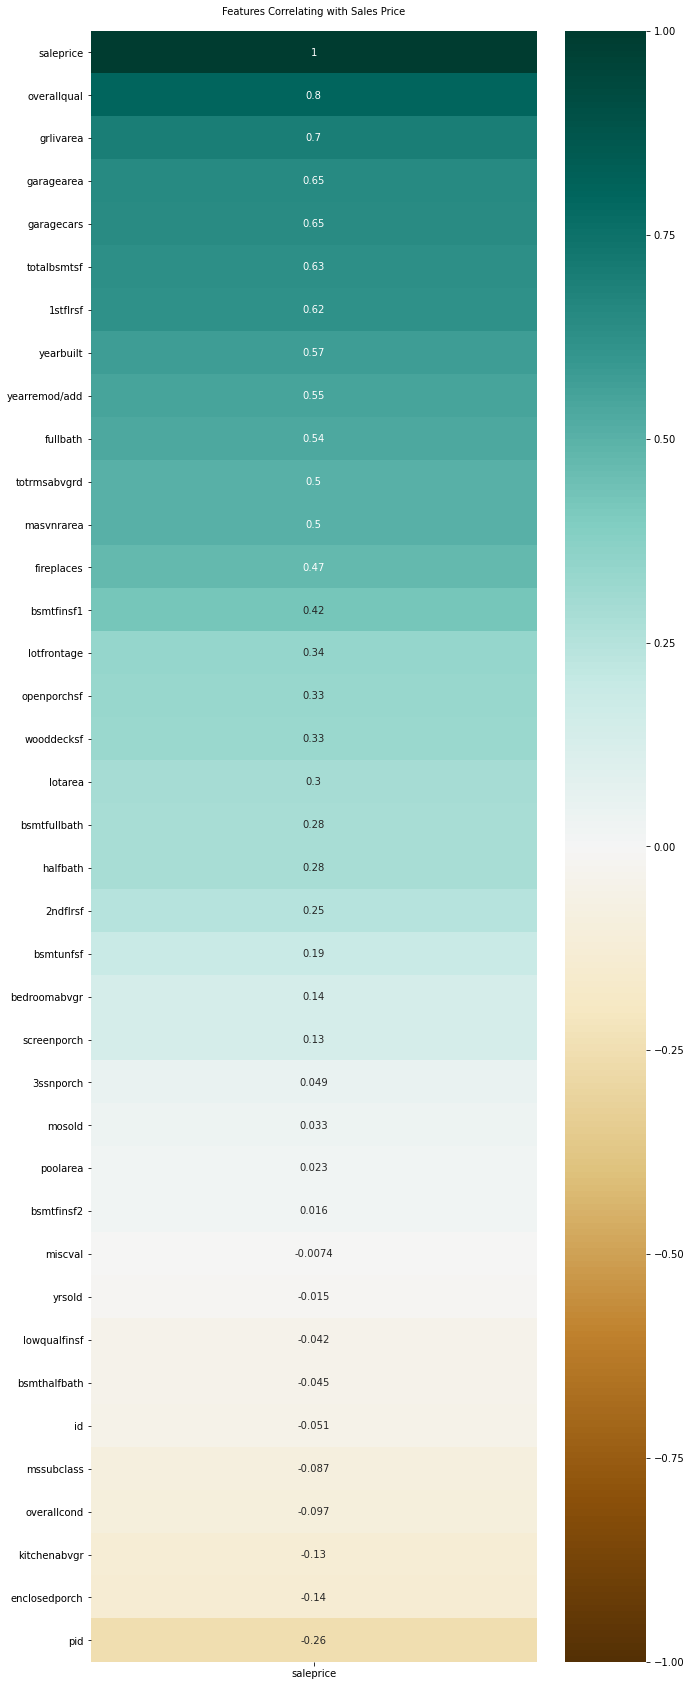

In [56]:
plt.figure(figsize=(10, 30))
heatmap = sns.heatmap(df_train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':10}, pad=16);

In [57]:
#sort features that has correlation with saleprice from highest to lowest
df_train.corr()[['saleprice']].sort_values('saleprice', ascending=False).head(11)

,saleprice
saleprice,1.000000
overallqual,0.800207
grlivarea,0.697038
garagearea,0.649897
garagecars,0.647781
totalbsmtsf,0.629303
1stflrsf,0.618486
yearbuilt,0.571849
yearremod/add,0.550370
fullbath,0.537969


Top 10 features that have highest correlation with saleprice are:   
overallqual, exterqual,grlivarea,kitchenqual,garagearea,garagecars,totalbsmtsf,1stflrsf,bsmtqual,yearbuilt

In [58]:
#plotting with features that I assumed that can make a difference in sale price from the correlation
assumed_feat = df_train[['saleprice','overallqual','exterqual','grlivarea','kitchenqual','garagearea','garagecars','totalbsmtsf','1stflrsf','bsmtqual','yearbuilt']]

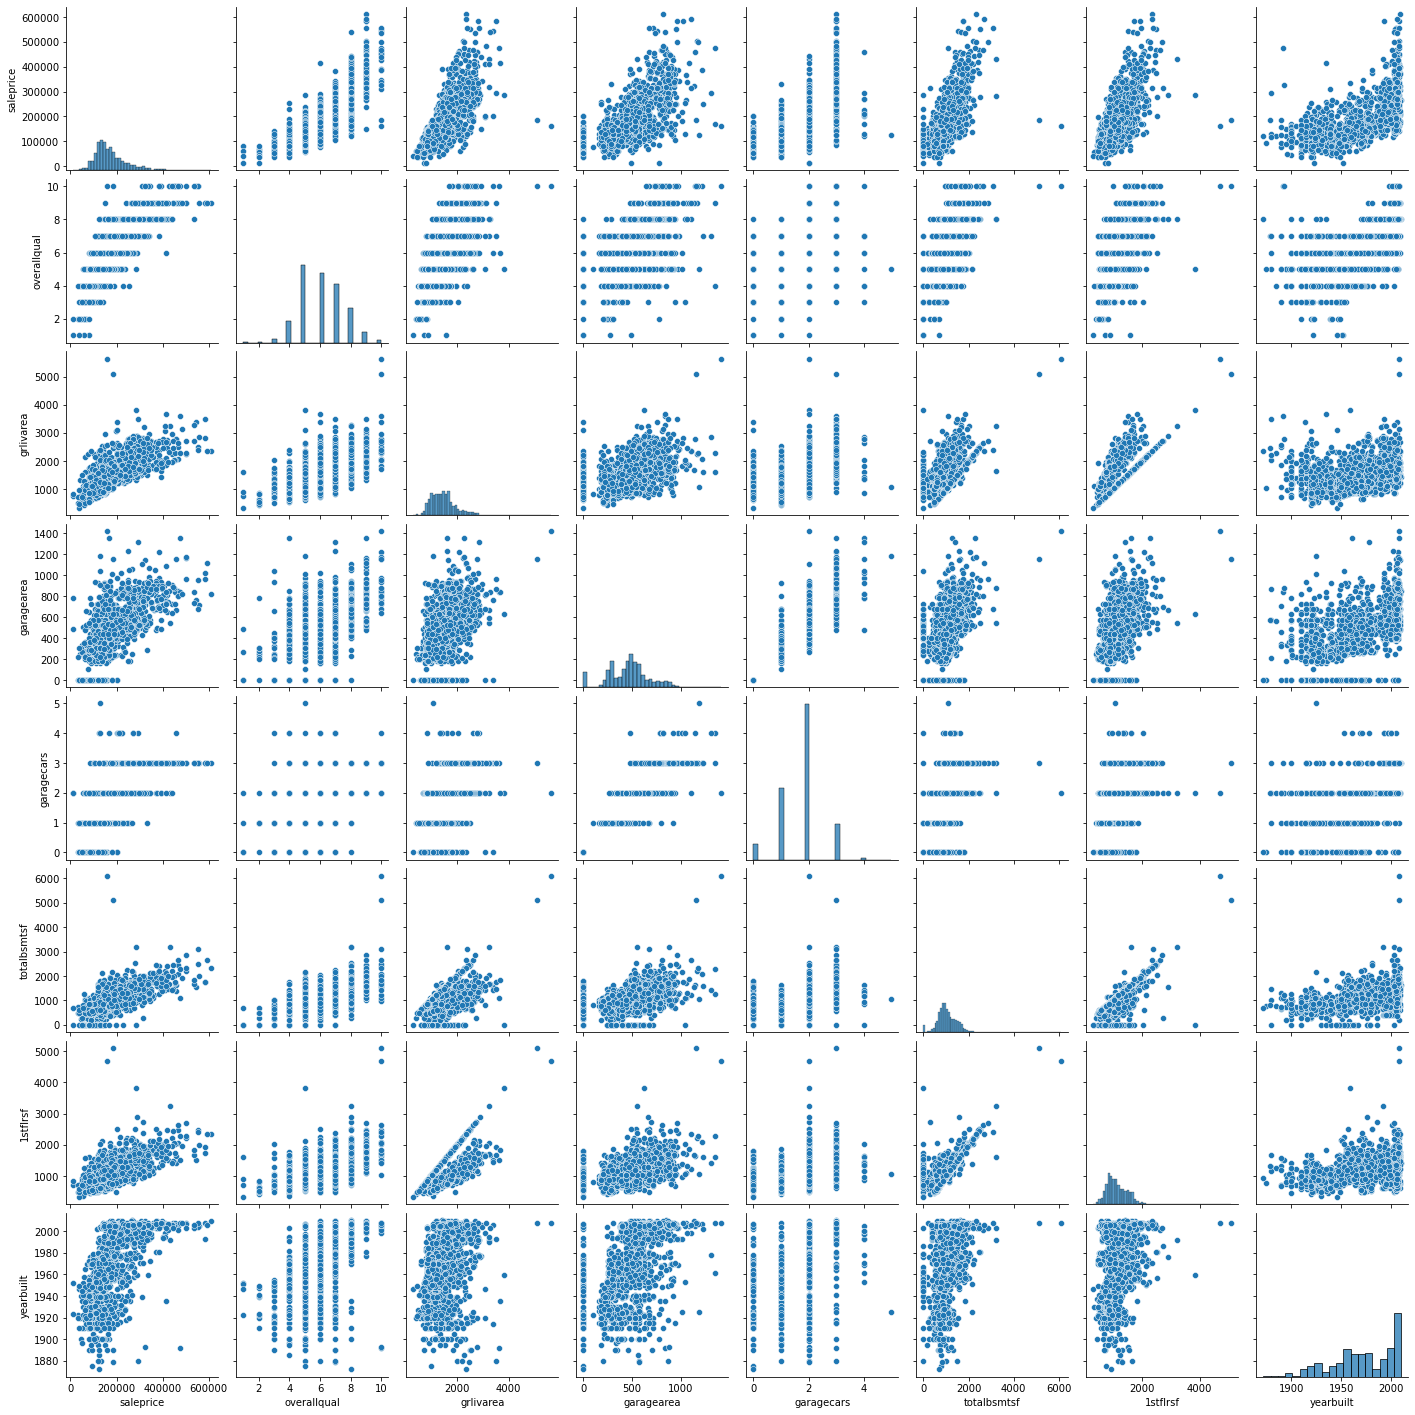

In [59]:
#plotting a pair plot to see if there is any relationship for my assumed features
sns.pairplot(assumed_feat)

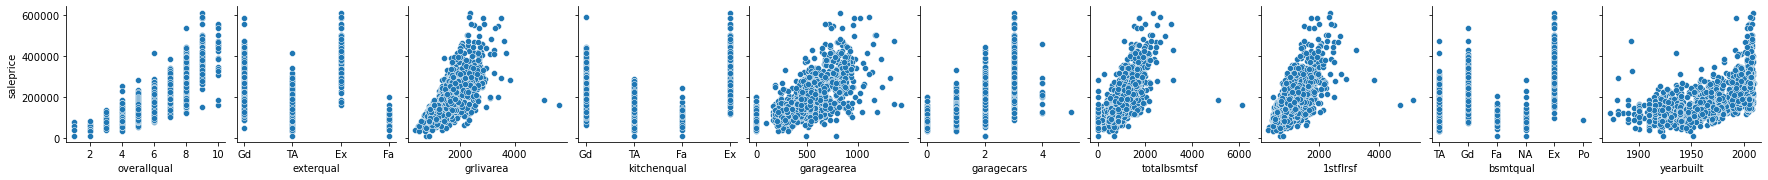

In [60]:
sns.pairplot(df_train,x_vars=['overallqual','exterqual','grlivarea','kitchenqual','garagearea','garagecars','totalbsmtsf','1stflrsf','bsmtqual','yearbuilt'],y_vars=['saleprice'])

These features have high correlation with saleprice of the house.

# EDA: Looking through features

1. Neighborhood

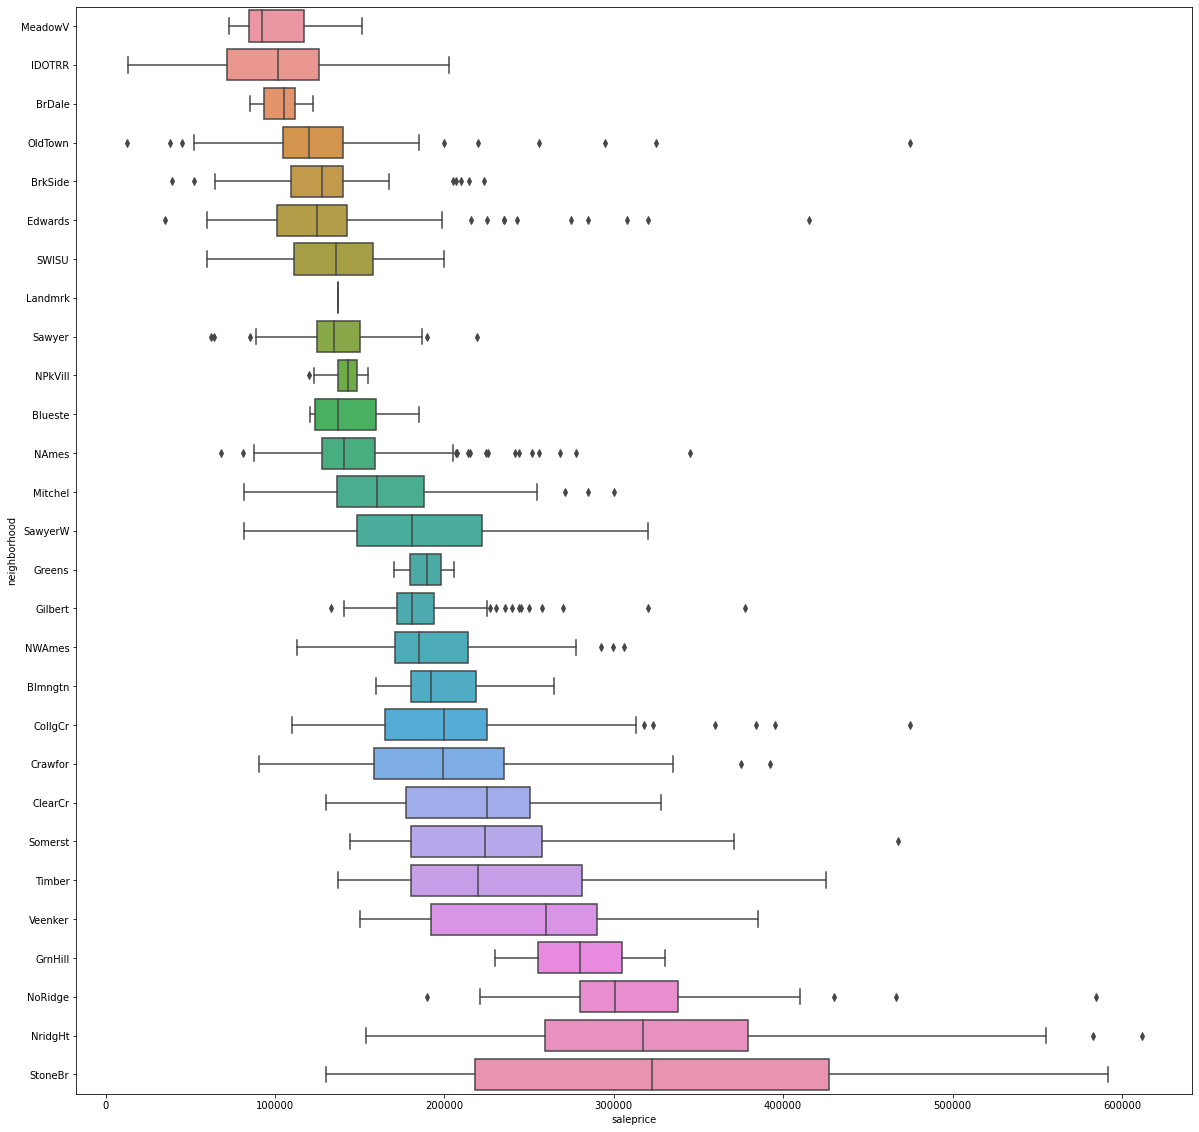

In [61]:
ranks = df_train[['saleprice','neighborhood']].groupby("neighborhood")["saleprice"].mean().sort_values(ascending = False)[::-1].index
plt.figure(figsize=(20,20))
sns.boxplot(data = df_train,x ='saleprice' , y ='neighborhood' , orient = 'h',order = ranks);

Top 5 Neighborhoods that have high saleprice: StoneBr, NridgHt, NoRidge, GrnHill, Veenker

2. Street

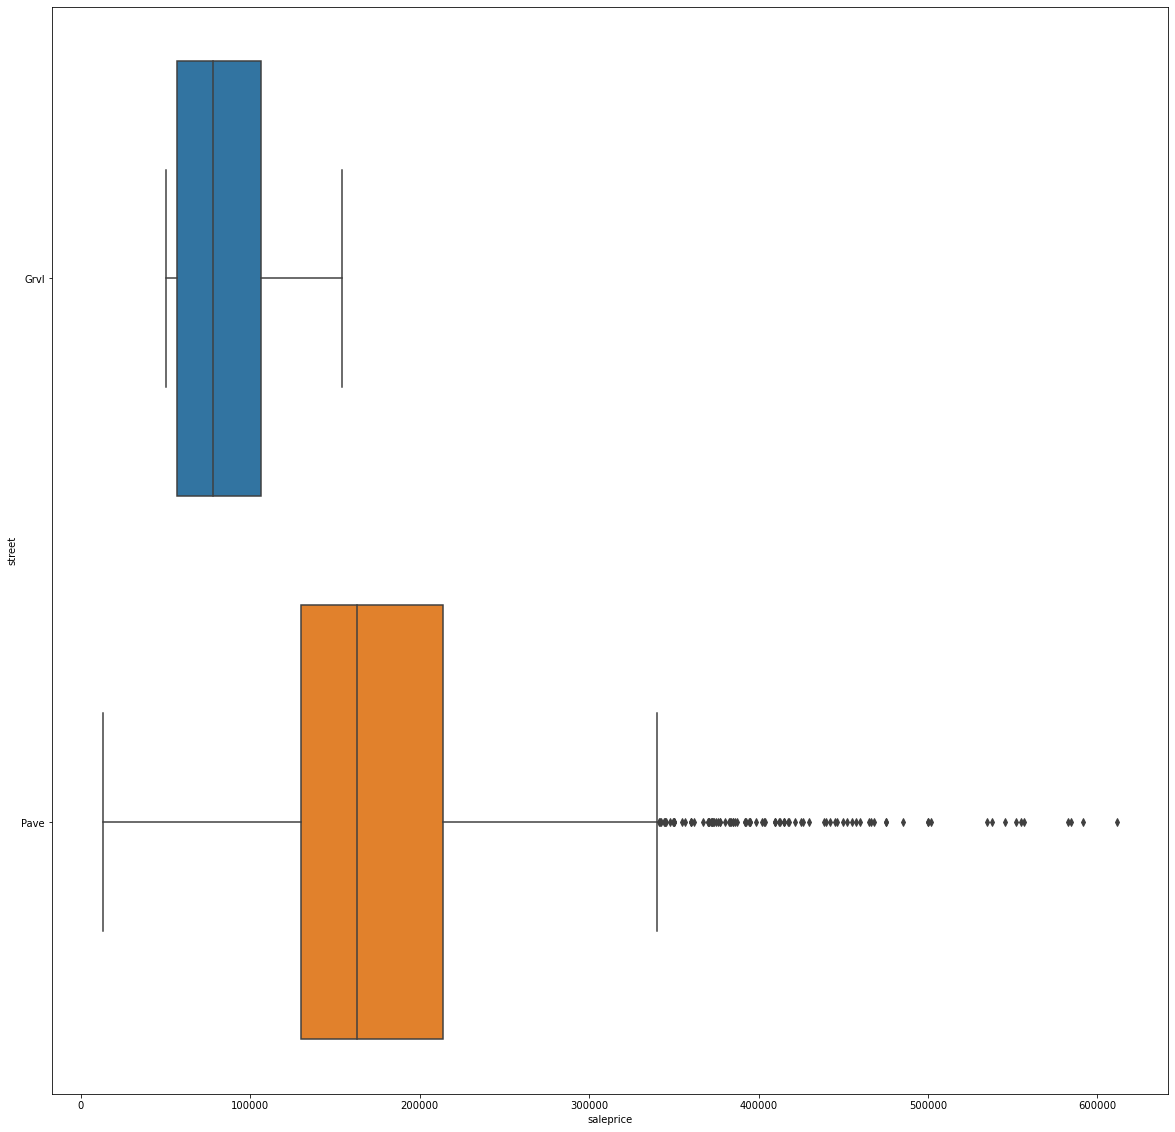

In [62]:
ranks = df_train[['saleprice','street']].groupby("street")["saleprice"].mean().sort_values(ascending = False)[::-1].index
plt.figure(figsize=(20,20))
sns.boxplot(data = df_train,x ='saleprice' , y ='street' , orient = 'h',order = ranks);

The graph above shows that streets that are paved sells at a slightly higher price.

3. Functional

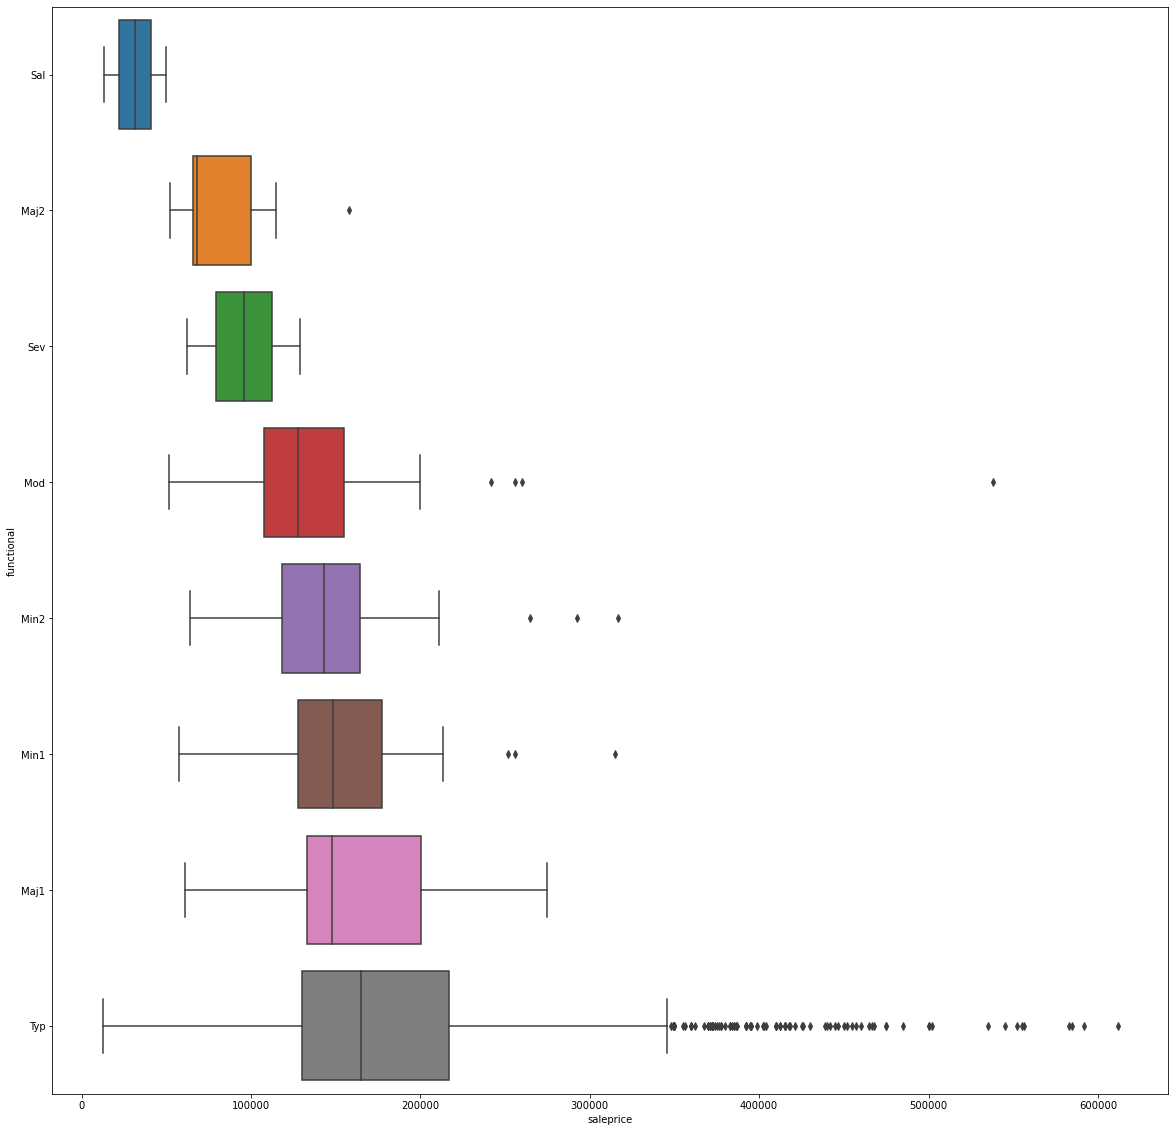

In [63]:
ranks = df_train[['saleprice','functional']].groupby("functional")["saleprice"].mean().sort_values(ascending = False)[::-1].index
plt.figure(figsize=(20,20))
sns.boxplot(data = df_train,x ='saleprice' , y ='functional' , orient = 'h',order = ranks);

Home functionality that is classes as typical, major deductions 1 , minor deduction 1 typically sells at higher price.


4. Condition 1 and 2

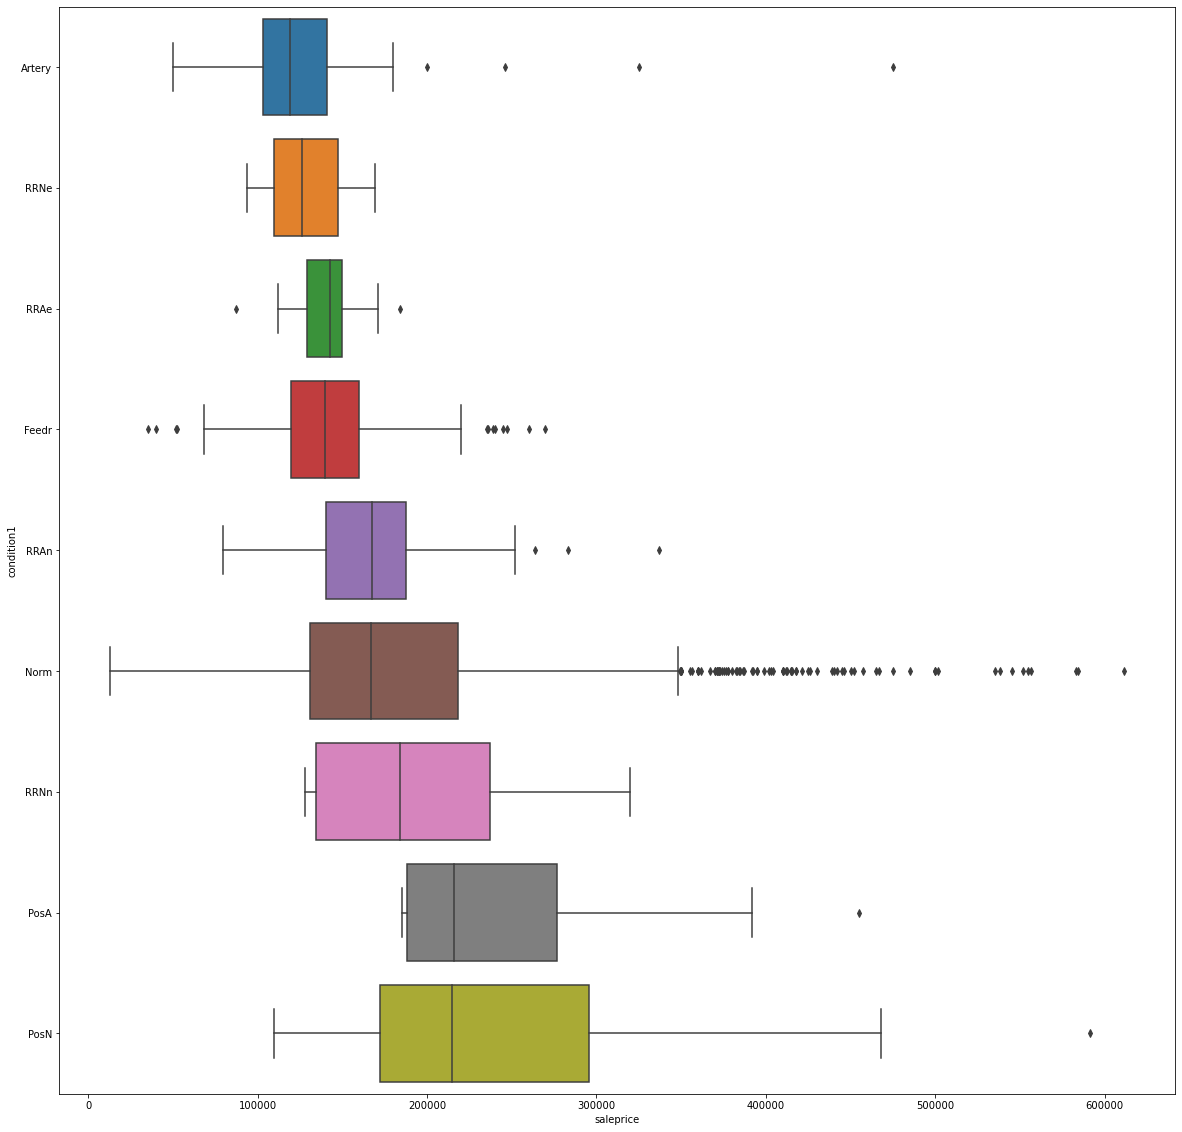

In [64]:
ranks = df_train[['saleprice','condition1']].groupby("condition1")["saleprice"].mean().sort_values(ascending = False)[::-1].index
plt.figure(figsize=(20,20))
sns.boxplot(data = df_train,x ='saleprice' , y ='condition1' , orient = 'h',order = ranks);

Houses that are (PosN)Near positive off-site feature--park, greenbelt, etc,(PosA)Adjacent to postive off-site feature

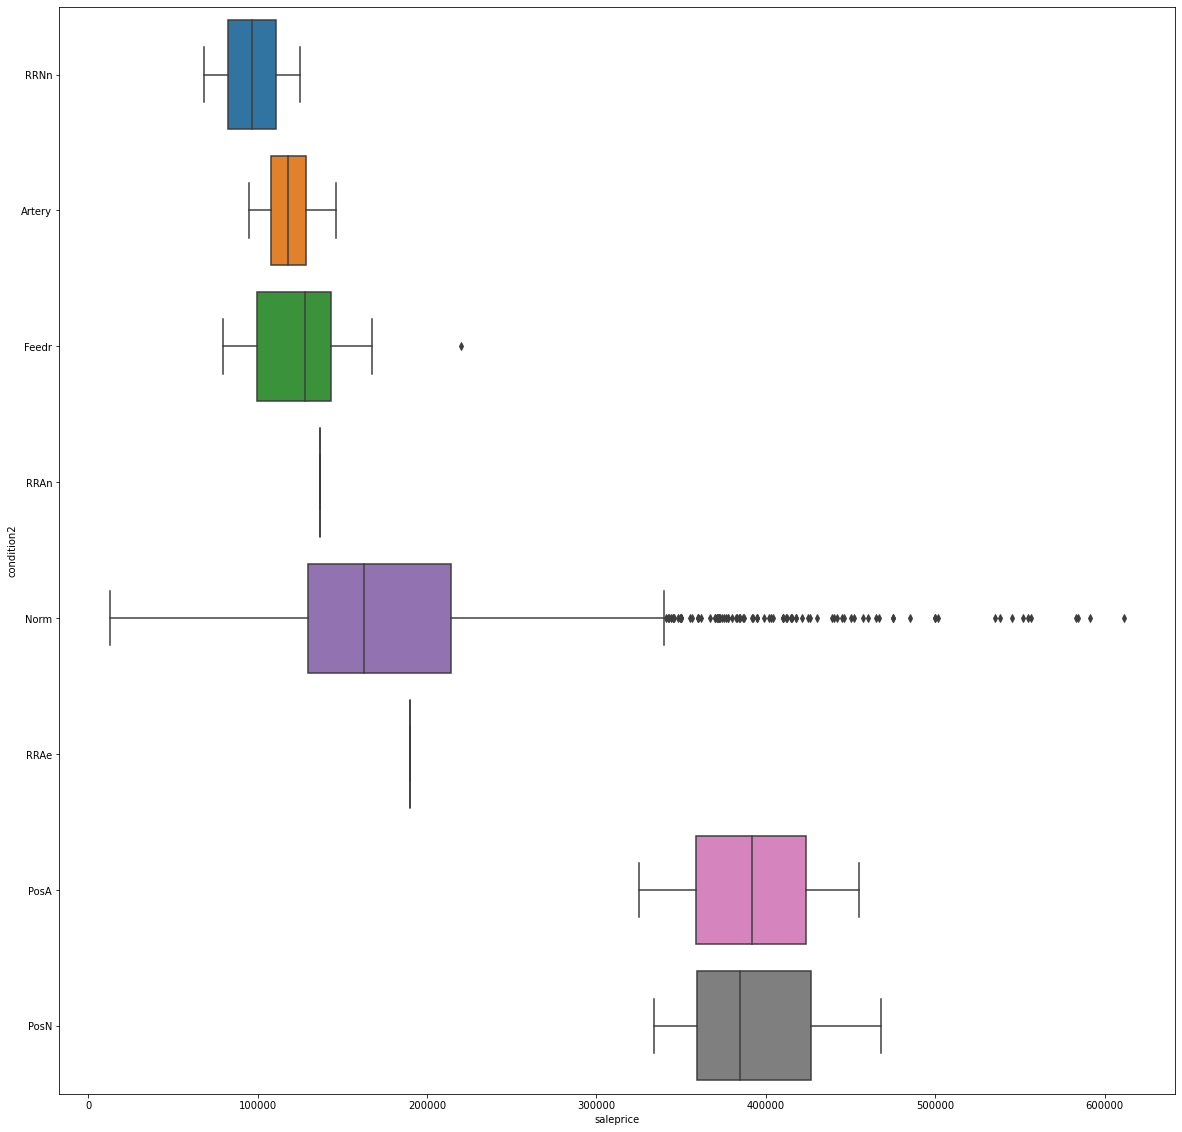

In [65]:
ranks = df_train[['saleprice','condition2']].groupby("condition2")["saleprice"].mean().sort_values(ascending = False)[::-1].index
plt.figure(figsize=(20,20))
sns.boxplot(data = df_train,x ='saleprice' , y ='condition2' , orient = 'h',order = ranks);

Houses that are (PosN)Near positive off-site feature--park, greenbelt, etc,(PosA)Adjacent to postive off-site feature. From both condition1 and condition2, houses near the rail roads sell at a cheaper price maybe due to the environment being noisy when the train comes.

5. Building type

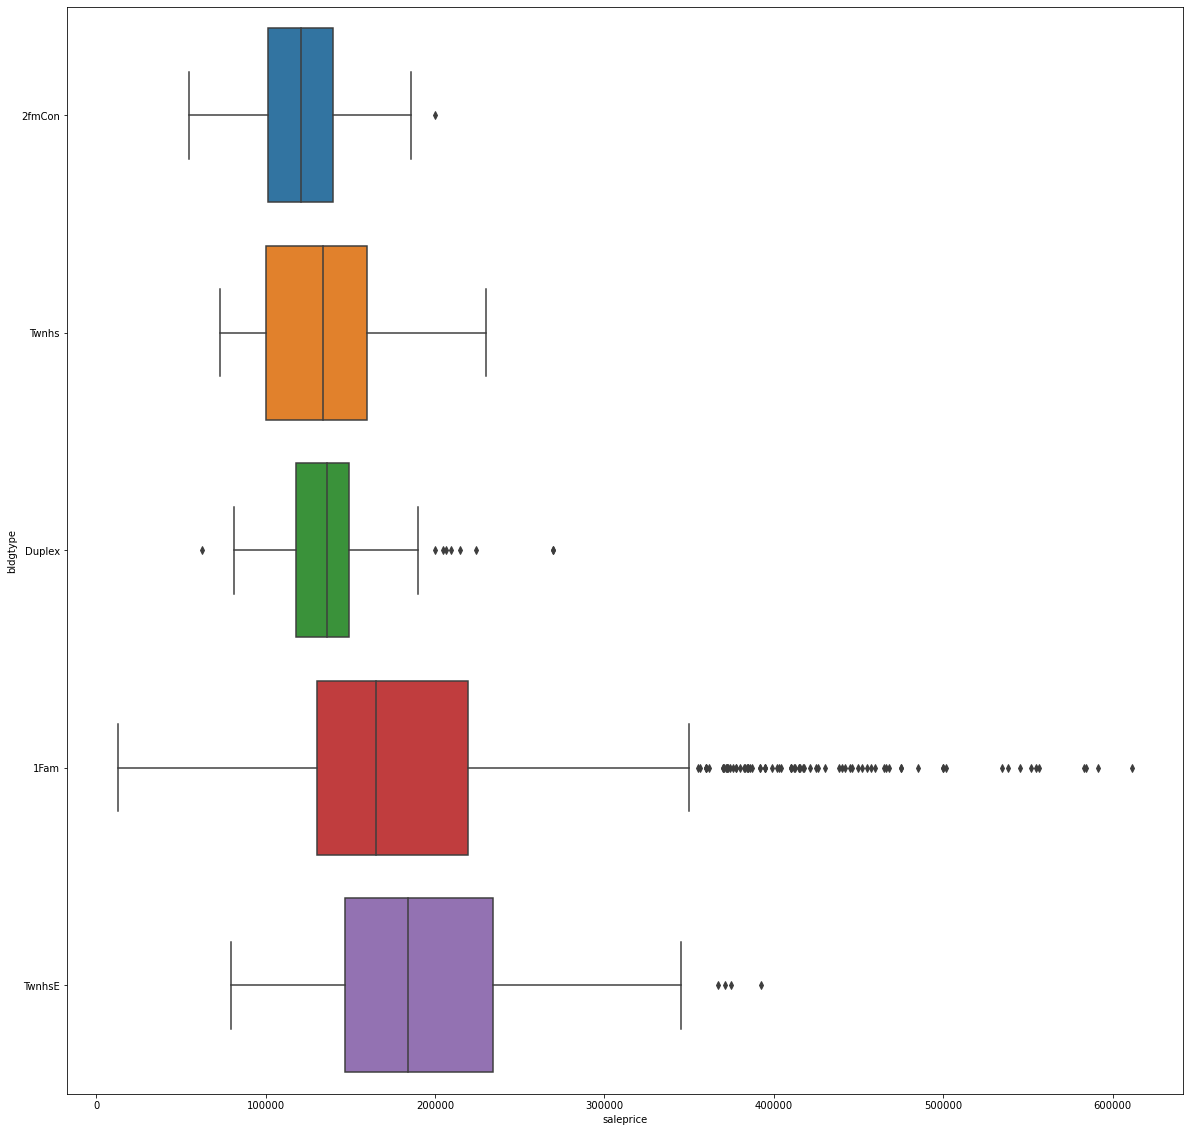

In [66]:
ranks = df_train[['saleprice','bldgtype']].groupby("bldgtype")["saleprice"].mean().sort_values(ascending = False)[::-1].index
plt.figure(figsize=(20,20))
sns.boxplot(data = df_train,x ='saleprice' , y ='bldgtype' , orient = 'h',order = ranks);

Townhouse End Unit and Single-family Detached are the top 2 in higher sales prices. 

# EDA: Preprocessing Outliers

Create boxplots for saleprice and some of the assumed features to see if there are any outliers.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='saleprice'>

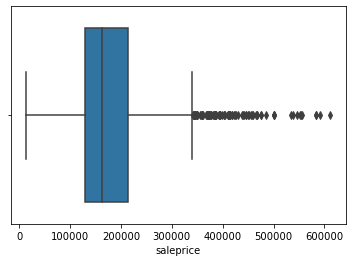

In [67]:
sns.boxplot(df_train['saleprice'])

There are a number of outliers in saleprice from the black dots seen on the right. I do not want to remove them as I would like my model to be able to predict with these.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overallqual'>

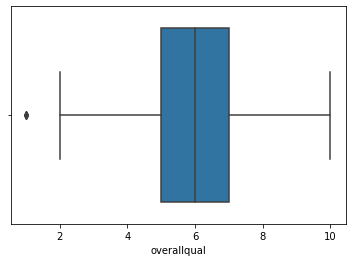

In [68]:
sns.boxplot(df_train['overallqual'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grlivarea'>

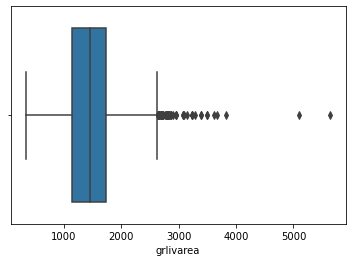

In [69]:
sns.boxplot(df_train['grlivarea'])

grlivarea has 2 outliers that is seen from the right side of the boxplot. Let's leave it first.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='garagearea'>

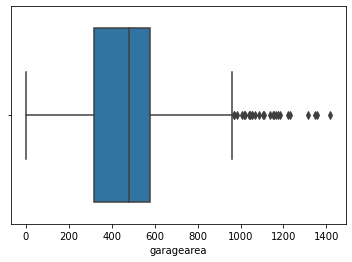

In [70]:
sns.boxplot(df_train['garagearea'])

garagearea seems to have a number of outliers. let's leave it and run our model first.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='garagecars'>

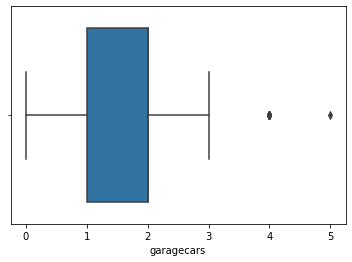

In [71]:
sns.boxplot(df_train['garagecars'])

garagecars seems to have 2 outliers. let's leave it first and run the model

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalbsmtsf'>

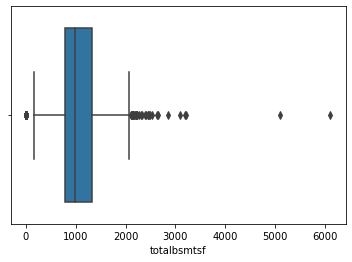

In [72]:
sns.boxplot(df_train['totalbsmtsf'])

totalbsmtsf seems to have 2 distinct outliers. 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1stflrsf'>

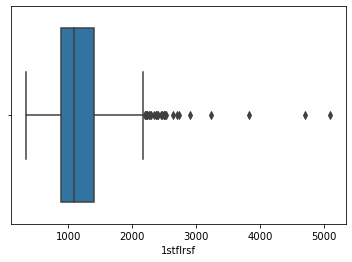

In [73]:
sns.boxplot(df_train['1stflrsf'])

From the boxplots, there are outliers for each of the features that highly correlated with saleprice. We will leave it first and do a base model before I decide what to do with the outliers.

# Feature Engineering: Binarize Ordinal Feature by Mapping

Since there are no null values left in train dataset, we can continue to map our ordinal data. I dropped Garage Yr Blt and Alley initially.

Total of 23 Ordinal features to map
- Lot Shape
- Utilities
- Land Slope
- Overall Qual (this is done)
- Overall Cond (this is done)
- Exter Qual
- Exter Cond
- Bsmt Qual 
- Bsmt Cond
- Bsmt Exposure 
- BsmtFin Type 1 
- BsmtFin Type 2
- HeatingQC
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- Garage Finish
- Garage Qual 
- Garage Cond 
- Paved Drive
- Pool QC 
- Fence

In [74]:
#specifying which features from the data that are ordinal
ordinal_columns = ['lotshape',
               'utilities',
               'landslope',
               'exterqual', 
               'extercond', 
               'bsmtqual', 
               'bsmtcond',
               'bsmtexposure', 
               'bsmtfintype1',
               'bsmtfintype2',
               'heatingqc',
               'electrical',
               'kitchenqual',
               'functional',
               'fireplacequ',
               'garagefinish',
               'garagequal',
               'garagecond', 
               'paveddrive',
               'poolqc', 
               'fence']

In [75]:
#mapping the respective data into a number for each of the ordinal columns
ordinal_values = [{'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
             {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
             {'Gtl':3, 'Mod':2, 'Sev':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}, 
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Y':3, 'P':2, 'N':1},
             {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0},
             {'GdPrv':4, 'MnPrv':3, 'GdWo':2,'MnWw':1,'NA':0}]

In [76]:
#function to map the ordinal data to a number
def ordinal_converter(columns,values,df):
    for i in range(0,21):
        df[columns[i]].replace(values[i],inplace=True)

In [77]:
#call the ordinal converter function to convert the ordinal data 
ordinal_converter(ordinal_columns,ordinal_values,df_train) 

In [78]:
#check the types of each column
df_train[['lotshape',
               'utilities',
               'landslope',
               'exterqual', 
               'extercond', 
               'bsmtqual', 
               'bsmtcond',
               'bsmtexposure', 
               'bsmtfintype1',
               'bsmtfintype2',
               'heatingqc',
               'electrical',
               'kitchenqual',
               'functional',
               'fireplacequ',
               'garagefinish',
               'garagequal',
               'garagecond', 
               'paveddrive',
               'poolqc', 
               'fence']].dtypes

lotshape        int64
utilities       int64
landslope       int64
exterqual       int64
extercond       int64
bsmtqual        int64
bsmtcond        int64
bsmtexposure    int64
bsmtfintype1    int64
bsmtfintype2    int64
heatingqc       int64
electrical      int64
kitchenqual     int64
functional      int64
fireplacequ     int64
garagefinish    int64
garagequal      int64
garagecond      int64
paveddrive      int64
poolqc          int64
fence           int64
dtype: object

Everything looks good as all are int64 values

In [79]:
df_train_ordinal = df_train[['lotshape',
               'utilities',
               'landslope',
               'exterqual', 
               'extercond', 
               'bsmtqual', 
               'bsmtcond',
               'bsmtexposure', 
               'bsmtfintype1',
               'bsmtfintype2',
               'heatingqc',
               'electrical',
               'kitchenqual',
               'functional',
               'fireplacequ',
               'garagefinish',
               'garagequal',
               'garagecond', 
               'paveddrive',
               'poolqc', 
               'fence']]   

In [80]:
df_train_ordinal.dtypes

lotshape        int64
utilities       int64
landslope       int64
exterqual       int64
extercond       int64
bsmtqual        int64
bsmtcond        int64
bsmtexposure    int64
bsmtfintype1    int64
bsmtfintype2    int64
heatingqc       int64
electrical      int64
kitchenqual     int64
functional      int64
fireplacequ     int64
garagefinish    int64
garagequal      int64
garagecond      int64
paveddrive      int64
poolqc          int64
fence           int64
dtype: object

In [81]:
df_train_continous = df_train[['lotfrontage',
                               'lotarea',
                               'masvnrarea',
                               'bsmtfinsf1',
                               'bsmtfinsf2',
                               'bsmtunfsf',
                               'totalbsmtsf',
                               '1stflrsf',
                               '2ndflrsf',
                               'lowqualfinsf',
                               'grlivarea',
                               'garagearea',
                               'wooddecksf',
                               'openporchsf',
                               'enclosedporch',
                               '3ssnporch',
                               'screenporch',
                               'poolarea',
                               'miscval']]

In [82]:
df_train_continous.dtypes

lotfrontage      float64
lotarea            int64
masvnrarea       float64
bsmtfinsf1       float64
bsmtfinsf2       float64
bsmtunfsf        float64
totalbsmtsf      float64
1stflrsf           int64
2ndflrsf           int64
lowqualfinsf       int64
grlivarea          int64
garagearea       float64
wooddecksf         int64
openporchsf        int64
enclosedporch      int64
3ssnporch          int64
screenporch        int64
poolarea           int64
miscval            int64
dtype: object

In [83]:
df_train_discrete = df_train[['yearbuilt',
                              'yearremod/add',
                              'bsmtfullbath',
                              'bsmthalfbath',
                              'fullbath',
                              'halfbath',
                              'kitchenabvgr',
                              'bedroomabvgr',
                              'totrmsabvgrd',
                              'fireplaces',
                              'garagecars',
                              'mosold',
                              'yrsold']]


In [84]:
df_train_discrete.dtypes

yearbuilt          int64
yearremod/add      int64
bsmtfullbath     float64
bsmthalfbath     float64
fullbath           int64
halfbath           int64
kitchenabvgr       int64
bedroomabvgr       int64
totrmsabvgrd       int64
fireplaces         int64
garagecars       float64
mosold             int64
yrsold             int64
dtype: object

# Feature Engineering: Binarize categorical features using dummies

Before doing any type of modelling, we will need to binarize features that are nominal as we can't run a model that has object or strings.   
  
The features are: 'mssubclass','mszoning','street','landcontour','lotconfig','neighborhood',  
                             'condition1','condition2','bldgtype','housestyle','roofstyle','roofmatl',  
                             'exterior1st','exterior2nd','masvnrtype','foundation','heating','centralair',  
                             'garagetype','miscfeature','saletype'  

In [85]:
#check remaining columns that are not an int or float
df_train.select_dtypes(exclude=[np.number]).columns

Index(['mszoning', 'street', 'landcontour', 'lotconfig', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation',
       'heating', 'centralair', 'garagetype', 'miscfeature', 'saletype'],
      dtype='object')

In [86]:
#specifying which features from the data that are categorical
cat_columns =['mszoning', 'street', 'landcontour', 'lotconfig', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation',
       'heating', 'centralair', 'garagetype', 'miscfeature', 'saletype']

In [87]:
#checking our train dataset
df_train.shape

(2051, 79)

In [88]:
# Creaing dummies for categorical cloumns
df_train = pd.get_dummies(columns=cat_columns, data=df_train,drop_first=True)

In [89]:
#checking our train dataset
df_train.shape

(2051, 196)

In [90]:
#looking at the train set info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 196 entries, id to saletype_WD 
dtypes: float64(10), int64(49), uint8(137)
memory usage: 1.2 MB


# Modelling

I will test out a few different models:  

1) **Linear Regression without Standard Scaler** 
(using the unscaled linear regression as the results for scaled didnt make any sense)
Pros:  
Simple model, Computationally efficient, Interpretability of the Output   
Cons:  
Overly-Simplistic, Linearity Assumption, Severely affected by Outliers, Independence of variables, Assumes Homoskedacity 


2) **Lasso**  
Pros:
It can avoid overfitting, can do feature selection, is fast in terms of inference and fitting.
    
Cons:
The model selected by lasso is not stable,model selection result is not intuitive to interpret, when there are highly correlated features, lasso may randomly select one of them of part of them. The result depends on the implementation.

3) **Ridge** (This can be done but I have decided to not to model with it)   

Pros:
Avoids overfitting a model.  
They does not require unbiased estimators.  
They add just enough bias to make the estimates reasonably reliable approximations to true population values.  
They still perform well in cases of a large multivariate data with the number of predictors (p) larger than the number of observations (n).  
The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.  

Cons:
They include all the predictors in the final model.  
They are unable to perform feature selection.  
They shrink the coefficients towards zero.  
They trade the variance for bias.  


#### Running all models with all features

In [91]:
#running an initial model with all features
X_all = df_train.drop(['id', 'pid', 'saleprice'],axis =1)
y = df_train['saleprice']

In [92]:
X_all

,mssubclass,lotfrontage,lotarea,lotshape,utilities,landslope,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,miscfeature_Gar2,miscfeature_NA,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,60,70.0,13517,3,4,3,6,8,1976,2005,289.0,4,3,3,3,1,6,533.0,1,0.0,192.0,725.0,5,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,0,3,2010,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,60,43.0,11492,3,4,3,7,5,1996,1997,132.0,4,3,4,3,1,6,637.0,1,0.0,276.0,913.0,5,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,0,4,2009,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,20,68.0,7922,4,4,3,5,7,1953,2007,0.0,3,4,3,3,1,6,731.0,1,0.0,326.0,1057.0,3,5,1057,0,0,1057,1.0,0.0,1,0

## Linear Regression without scaling

In [93]:
#create a linear function to run linear regression and the scores
def linear(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    lr = LinearRegression()
    
    lr_model = lr.fit(X_train,y_train) #fit model using train data
    
    y_train_pred = lr.predict(X_train)
    MSE_train = mean_squared_error(y_train, y_train_pred) # evaluate MSE for training set
    
    y_test_pred = lr_model.predict(X_test) #predict y test
    MSE_test = mean_squared_error(y_test, y_test_pred) #MSE result for test set
    
    print('----- Linear Regression -----')
    print('MSE TRAIN:',MSE_train,'MSE TEST:', MSE_test)
    
    # check for overfitting
    MSE_diff = abs(1-(MSE_train/MSE_test))

    print('Difference in MSE:', MSE_diff*100, "%") # if this is between 1-2%, then no overfitting.
    
    #this will sort the top 10 coefficient for the regression and map it with the feature
    lr_coef = lr.coef_
    lr_coefficient = sorted(zip(map(lambda X: round(X, 4), lr_coef),X.columns), reverse=True)[:10]
    lr_10_best=[k[1] for k in sorted(lr_coefficient, key = lambda X : X, reverse = True)[:10]]
    
    print('LR 10 best:',lr_10_best)
    
    #code to plot the regression prediction performance
    plt.figure(figsize = (20,12))
    sns.scatterplot(y_test_pred, y_test)
    plt.title('Linear regression predictions performance', fontsize=30)
    plt.xlabel('Predicted values', fontsize=15)
    plt.ylabel('Real values', fontsize=15)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--')
    
    return lr_10_best,lr_coefficient

----- Linear Regression -----
MSE TRAIN: 426711154.0127799 MSE TEST: 607328281.6964351
Difference in MSE: 29.73962074994134 %
LR 10 best: ['roofmatl_WdShngl', 'roofmatl_Membran', 'roofmatl_WdShake', 'roofmatl_CompShg', 'roofmatl_Tar&Grv', 'miscfeature_Othr', 'miscfeature_NA', 'miscfeature_Shed', 'miscfeature_Gar2', 'miscfeature_TenC']


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(['roofmatl_WdShngl',
  'roofmatl_Membran',
  'roofmatl_WdShake',
  'roofmatl_CompShg',
  'roofmatl_Tar&Grv',
  'miscfeature_Othr',
  'miscfeature_NA',
  'miscfeature_Shed',
  'miscfeature_Gar2',
  'miscfeature_TenC'],
 [(718677.4111, 'roofmatl_WdShngl'),
  (677517.0061, 'roofmatl_Membran'),
  (674268.5333, 'roofmatl_WdShake'),
  (656162.231, 'roofmatl_CompShg'),
  (636686.4485, 'roofmatl_Tar&Grv'),
  (588304.3572, 'miscfeature_Othr'),
  (557282.5274, 'miscfeature_NA'),
  (556445.7857, 'miscfeature_Shed'),
  (556055.7684, 'miscfeature_Gar2'),
  (523985.4356, 'miscfeature_TenC')])

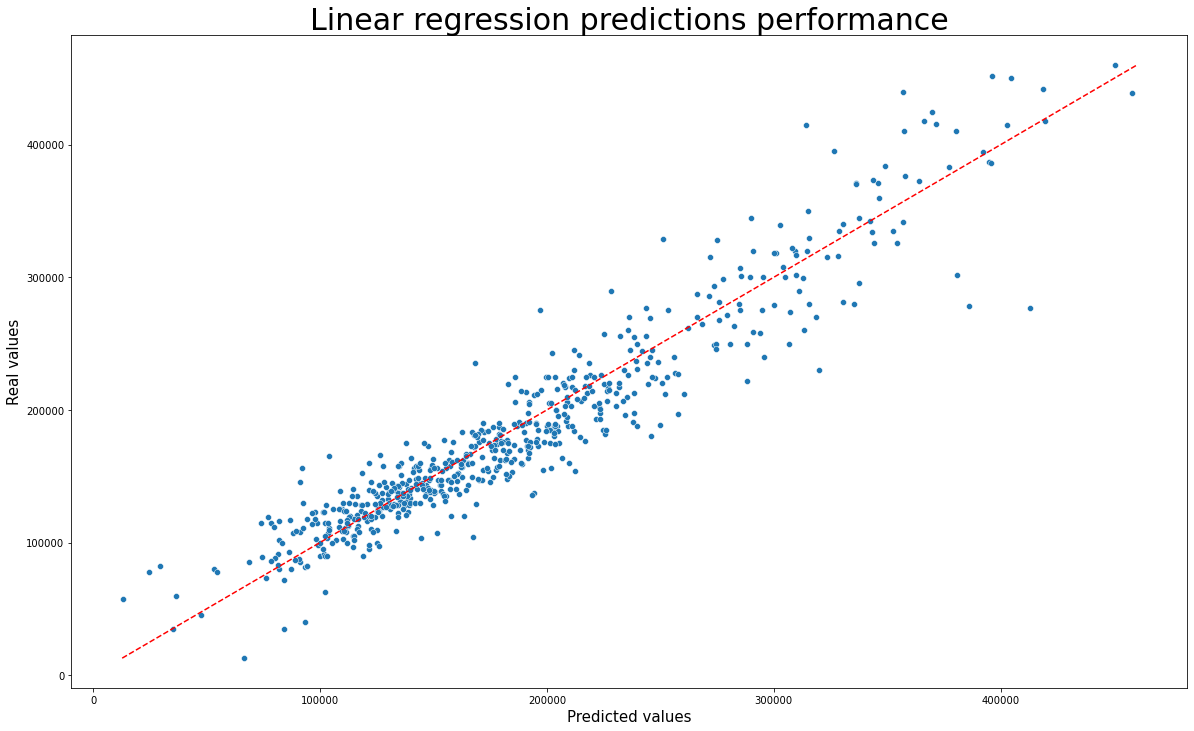

In [94]:
linear(X_all,y)

model is overfitted as the percentage of MSE is very high.

## Linear Regression with Lasso regularisation

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

We can also run linear regression with lasso regularisation as well to see and compare which model is better. 

In [96]:
# State the parameters you want to search for lasso regularisation

parameters = {'alpha': np.logspace(0.01, 10, 20)}

# Instantiate the model
lasso = Lasso()

# Instantiate Gridsearch (use previous instantiated parameters and model)
gs_lr = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

In [97]:
# Fit  models on the training data:
#    5-fold cross-validation. Each fold has to test out 1000 different alpha values.
#    Find the best alpha value (and corresponding coefficients) 
gs_lr.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [98]:
# show the best parameter
print(gs_lr.best_params_)

{'alpha': 129.76509670912637}


In [99]:
# now we retrain using the best param for alpha on the entire training data
best_model = Lasso(alpha=129.765)
best_model.fit(X_train, y_train)

Lasso(alpha=129.765)

In [100]:
# evaluate MSE for training set
y_train_pred = best_model.predict(X_train)
MSE_train = mean_squared_error(y_train, y_train_pred)

In [101]:
# evaluate MSE for test set
y_test_pred = best_model.predict(X_test)
MSE_test = mean_squared_error(y_test, y_test_pred)

In [102]:
# print results
print(MSE_train, MSE_test)

684305455.0632423 686359275.0922482


In [103]:
# check for overfitting
MSE_diff = abs(1-(MSE_train/MSE_test))

print(MSE_diff*100, "%") # if this is between 1-2%, then no overfitting.

0.29923395858967305 %


There is no overfitting. Hence it is a better model comapred to the linear regression model

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


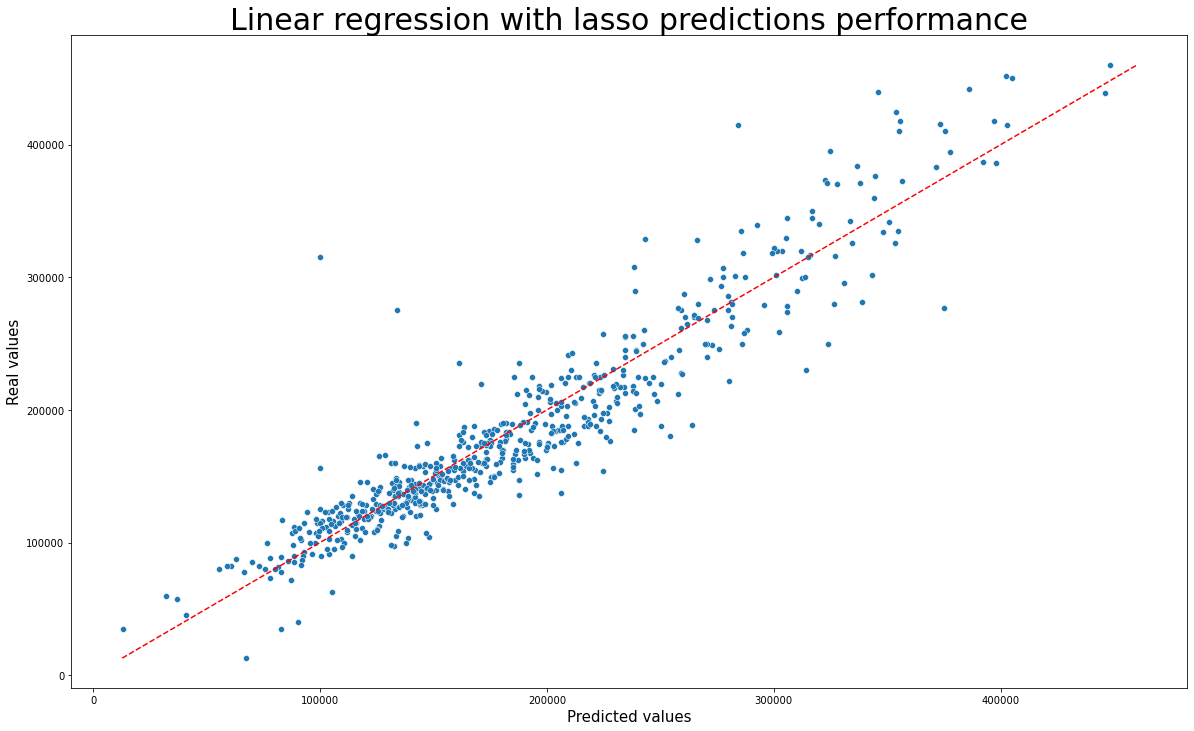

In [104]:
#code to plot the regression prediction performance
plt.figure(figsize = (20,12))
sns.scatterplot(y_test_pred, y_test)
plt.title('Linear regression with lasso predictions performance', fontsize=30)
plt.xlabel('Predicted values', fontsize=15)
plt.ylabel('Real values', fontsize=15)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', linestyle='--')

In [105]:
best_model_coef = best_model.coef_
lasso_coefficient = sorted(zip(map(lambda X_all: round(X_all, 4), best_model_coef),X_all.columns), reverse=True)[:10]
lasso_10_best=[k[1] for k in sorted(lasso_coefficient, key = lambda X_all : X_all, reverse = True)[:10]]

In [106]:
print(lasso_10_best)

['neighborhood_StoneBr', 'neighborhood_NridgHt', 'miscfeature_Gar2', 'neighborhood_NoRidge', 'neighborhood_GrnHill', 'condition1_PosN', 'saletype_New', 'landcontour_HLS', 'exterqual', 'neighborhood_Crawfor']


Above are the top 10  features that was given by  the regression model. 

# Predicting the saleprice using Test.CSV

In order to predict the saleprice using a test.csv file, we will have to clean it the same way with the same steps that we did earlier with train.csv. This is to maintain fairness. 

In [107]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [108]:
df_test.shape

(878, 80)

In [109]:
df_test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [110]:
#changing the columns names to lowercase and no spaces
df_test.columns = df_test.columns.str.lower().str.replace(' ', '')

Doing the same exact steps that we did for test.csv above...

In [111]:
df_test.drop(labels=['garageyrblt','alley'], axis=1, inplace = True)

In [112]:
df_test['lotfrontage'] = df_test.groupby('neighborhood')['lotfrontage'].apply(lambda x: x.fillna(x.median()))

In [113]:
df_test[(df_test['neighborhood'] == 'GrnHill') | (df_test['neighborhood'] == 'Landmrk')]

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype


In [114]:
df_test['lotfrontage'] = df_test['lotfrontage'].fillna(df_test['lotfrontage'].median())

In [115]:
df_test['masvnrtype'] = df_test['masvnrtype'].fillna('None')
df_test['masvnrarea'] = df_test['masvnrarea'].fillna(0)

In [116]:
df_test['totalbsmtsf'] = df_test['totalbsmtsf'].fillna(0)
df_test['bsmtfinsf1'] = df_test['bsmtfinsf1'].fillna(0)
df_test['bsmtfinsf2'] = df_test['bsmtfinsf2'].fillna(0)
df_test['bsmtunfsf'] = df_test['bsmtunfsf'].fillna(0)
df_test['bsmtqual'] = df_test['bsmtqual'].fillna('NA')
df_test['bsmtcond'] = df_test['bsmtcond'].fillna('NA')
df_test['bsmtexposure'] = df_test['bsmtexposure'].fillna('NA')
df_test['bsmtfintype1'] = df_test['bsmtfintype1'].fillna('NA')
df_test['bsmtfintype2'] = df_test['bsmtfintype2'].fillna('NA')
df_test['bsmtfullbath'] = df_test['bsmtfullbath'].fillna(0)
df_test['bsmthalfbath'] = df_test['bsmthalfbath'].fillna(0)

In [117]:
df_test['garagetype'] = df_test['garagetype'].fillna('NA')
df_test['garagefinish'] = df_test['garagefinish'].fillna('NA')
df_test['garagecars'] = df_test['garagecars'].fillna(0)
df_test['garagearea'] = df_test['garagearea'].fillna(0)
df_test['garagequal'] = df_test['garagequal'].fillna('NA')
df_test['garagecond'] = df_test['garagecond'].fillna('NA')

In [118]:
df_test['fireplacequ'] = df_test['fireplacequ'].fillna('NA')

In [119]:
df_test['poolqc'] = df_test['poolqc'].fillna('NA')

In [120]:
df_test['fence'] = df_test['fence'].fillna('NA')

In [121]:
df_test['miscfeature'] = df_test['miscfeature'].fillna('NA')

In [122]:
df_test.isnull().sum()

id               0
pid              0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremod/add    0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       0
bsmtfintype2     0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
heating          0
heatingqc        0
centralair       0
electrical       1
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr

In [123]:
df_test['electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [124]:
#as this feature has a nan whereas the df_train doesn't I decided to just fill it with FuseP. 
df_test['electrical'].fillna('FuseP',inplace=True)

In [125]:
df_test['electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF'], dtype=object)

In [126]:
#check the shape of df_test
df_test.shape

(878, 78)

In [127]:
#checking if there is any null left
df_test.isnull().sum().sum()

0

In [128]:
#saving the cleaned test.csv to a new file
df_test.to_csv('cleaned_test.csv')

In [129]:
#call the ordinal converter function to convert the ordinal data 
ordinal_converter(ordinal_columns,ordinal_values,df_test) 

In [130]:
#check remaining columns that are not an int or float
df_test.select_dtypes(exclude=[np.number]).columns

Index(['mszoning', 'street', 'landcontour', 'lotconfig', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation',
       'heating', 'centralair', 'garagetype', 'miscfeature', 'saletype'],
      dtype='object')

In [131]:
#specifying which features from the data that are categorical
cat_columns =['mszoning', 'street', 'landcontour', 'lotconfig', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation',
       'heating', 'centralair', 'garagetype', 'miscfeature', 'saletype']

In [132]:
# Creaing dummies for categorical cloumns
df_test = pd.get_dummies(columns=cat_columns, data=df_test,drop_first=True)

In [133]:
df_test.shape

(878, 185)

In [134]:
df_train.shape

(2051, 196)

In [135]:
#running an initial model with all features for X_test using test.csv
X_test = df_test.drop(['id', 'pid'],axis =1)

In [136]:
X_train.shape

(1435, 193)

In [137]:
X_test.shape

(878, 183)

I realised that there is a difference in columns for my train and test set after cleaning it the exact same way. I am unsure why this happens. 

In [138]:
#the difference columns between X_train and X_test
c_columns = set(X_train) - set(X_test)
print(c_columns)

{'mszoning_C (all)', 'roofmatl_CompShg', 'condition2_RRAn', 'miscfeature_Gar2', 'condition2_PosN', 'neighborhood_Landmrk', 'miscfeature_TenC', 'heating_Wall', 'heating_OthW', 'condition2_RRNn', 'exterior2nd_Stone', 'exterior1st_CBlock', 'roofmatl_Membran', 'exterior1st_ImStucc', 'condition2_RRAe', 'neighborhood_GrnHill', 'exterior1st_Stone', 'condition2_Feedr'}


In [139]:
#matching the same columns in train into a new dataframe called X_test_kaggle
X_test_kaggle = pd.DataFrame()
for field in X_train.columns:
    if field in X_test:
        X_test_kaggle[field] = X_test[field]
    else:
        X_test_kaggle[field] = 0
        print(field)

mszoning_C (all)
neighborhood_GrnHill
neighborhood_Landmrk
condition2_Feedr
condition2_PosN
condition2_RRAe
condition2_RRAn
condition2_RRNn
roofmatl_CompShg
roofmatl_Membran
exterior1st_CBlock
exterior1st_ImStucc
exterior1st_Stone
exterior2nd_Stone
heating_OthW
heating_Wall
miscfeature_Gar2
miscfeature_TenC


In [140]:
X_test_kaggle.shape

(878, 193)

In [141]:
#predict the saleprice for X_test_kaggle
y_testcsv_pred = best_model.predict(X_test_kaggle)

In [142]:
X_test_kaggle['saleprice'] = y_testcsv_pred

In [143]:
#entire dataframe with the predicted saleprice
X_test_kaggle

,mssubclass,lotfrontage,lotarea,lotshape,utilities,landslope,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heatingqc,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscval,mosold,yrsold,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_NA,miscfeature_Gar2,miscfeature_NA,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,saleprice
0,190,69.0,9142,4,4,3,6,8,1910,1950,0.0,3,2,2,3,1,1,0,1,0,1020,1020,4,2,908,1020,0,1928,0,0,2,0,4,2,2,9,7,0,0,1,1,440,1,1,3,0,60,112,0,0,0,0,0,0,4,2006,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,133928.169401
1,90,75.0,9662,3,4,3,5,4,1977,1977,0.0,3,3,4,3,1,1,0,1,0,1967,1967,3,5,1967,0,0,1967,0,0,2,0,6,2,3,10,7,0,0,3,2,580,3,3,3,170,0,0,0,0,0,0,0,0,8,2006,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,147362.337332
2,60,58.0,17104,3,4,3,7,5,2006,2006,0.0,4,3,4,4,3,6,554,1,0,100,654,5,5,664,832,0,1496,1,0,2,1,3,1,4,

To answer the problem statement above, the top 10 features that the model predict are:  

1) Stone Brook neighbourhood   
2) Northridge Heights neighbourhood  
3) Misc Features: 2nd Garage  
4) Northridge Neighbourhood  
5) Green Hills Neighbourhood  
6) Proximity to various conditions: Near positive off-site feature--park, greenbelt, etc.  
7) Sale Type: Home just constructed and sold  
8) Landcontour: flatness of property: Hillside - Significant slope from side to side  
9) Evaluates the quality of the material on the exterior  
10) Crawford Neighbourhood  

From this results, what I can infer is that neighbourhood is important at fetching higher saleprice. My company could look into houses that are located in these neighbourhoods, do a small scale renovations and sell them at a much higher price after as a business as well. 


Things that can be improved on in the future:

- removal of outliers in the features and  re-run the model to see if this affects our model and in return, gives different top features compared to my results

- disgnosing on multicollinearity using : The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model.Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

This can be done by doing further feature engineering and run a model to compare the results, such as:

- removal of features that are pretty similar( example:landslope as there is landcontour already)   
- creating new features (such as age of the house etc)
- try different model: ridge, kbest to compare the results 